# Christmas Tree Maker

``` py
make_tree(tree_height, tree_width, resolution=20, tangent=1.5, leaf_height=0.8, trunk_width=0.05, orna_freq=1, 
bark_color='#660000', bg_color='#FFFFFF', orna1_color='#FFFF00', orna2_color='#FF0000', leaf_color='#003300')
```

### Parameters

**`tree_height` :** ***int***

Determines the number of pixels for the height of the tree. Should not be smaller than **`resolution`**.

**`tree_width`:** ***int***

Determines the number of pixels for the width of the tree. Should not be smaller than **`resolution`**.

**`resolution`:** ***float, optional***

Determines the resolution of the output image. Setting this parameter higher will make the image more clear but smaller.

**`tangent`:** ***float, optional***

Determines the tangent of the tree leaves. Setting this parameter higher will make your tree sharper. Should not be smaller than 0.

**`leaf_height`:** ***float, optional***

Determines the height of the tree leaves. Should be between 0 and 1.

**`trunk_width`:** ***float, optional***

Determines the width of the trunk. Should be between 0 and 1.

**`orna_freq`:** ***float, optional***

Determines the number of ornaments. If you set this parameter higher, more ornaments will be on the tree. Should not be smaller than 0.

**`bark_color`:** ***color, optional***

Bark color.

**`bg_color`:** ***color, optional***

Background color.

**`orna1_color`:** ***color, optional***

Ornament1 color.

**`orna2_color`:** ***color, optional***

Ornament2 color.

**`leaf_color` :** ***color, optional***

Leaf color.

### Codes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def make_tree(tree_height, tree_width, resolution=20, tangent=1.5, leaf_height=0.8, trunk_width=0.05, orna_freq=1, 
              bark_color='#660000', bg_color='#FFFFFF', orna1_color='#FFFF00', orna2_color='#FF0000', leaf_color='#003300'):
    
    tree = np.arange(tree_height*tree_width).reshape(tree_height,tree_width).astype('float64')
    tree[(tree % tree_width > tree_width // 2 + tree // (tree_height*tangent)) | 
         (tree % tree_width < tree_width // 2 - tree // (tree_height*tangent))] = 0
    tree[(tree >= tree_height*tree_width*leaf_height) & 
         ((tree % tree_width > tree_width // 2 + tree_width*trunk_width) | 
          (tree % tree_width < tree_width // 2 - tree_width*trunk_width))] = 0
    tree[tree > 0 ] = 1
    tree[:int(tree_height*leaf_height),:] *= np.random.normal(40, orna_freq*4, (int(tree_height*leaf_height), tree_width))
    tree[int(tree_height*leaf_height):,:] *= -20

    palette = [bark_color, bg_color, orna1_color, leaf_color, orna2_color]
    cmap = sns.color_palette(palette, len(palette), as_cmap=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(tree_width//resolution, tree_height//resolution))
    sns.heatmap(tree-20, center=0, cmap=cmap, vmin=-50, vmax=50, cbar=False, xticklabels=False, yticklabels=False)
    plt.show()

### Examples

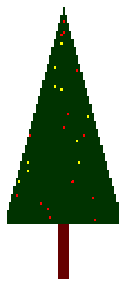

In [3]:
make_tree(100, 50)

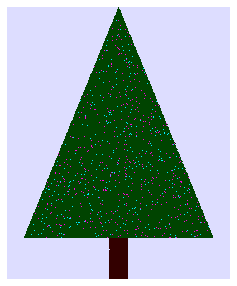

In [4]:
make_tree(500, 400, resolution=100, tangent=2, leaf_height=0.85, trunk_width=0.04, orna_freq=1.2, bark_color='#330000', 
          bg_color='#DDDDFF', orna1_color='#00EEFF', orna2_color='#FF00DD', leaf_color='#004400')